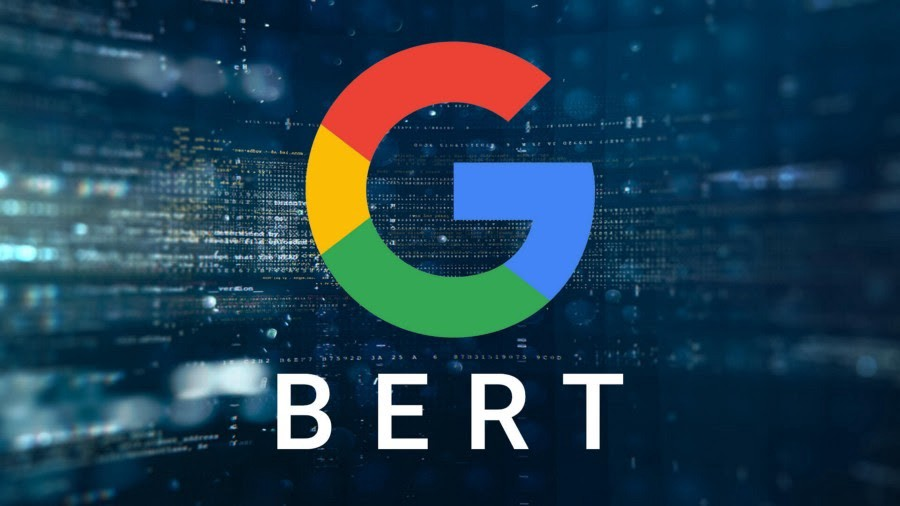

Source : (https://www.greatcontent.com/google-bert/)

In 2018, the Google AI team made a revolutionary change in the field of Natural Language Processing ( NLP) by introducing Bidirectional Encoder Representations from Transformers (BERT). Due to its highly pragmatic approach, and higher performance, BERT is highlighted for achieving state-of-the-art performance in many NLP tasks

## Why BERT Embedding?

BERT has an advantage over models like Word2Vec because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them

In this notebook, we will explore BERT model for food recommendation.
If you like this notebook, please upvote !

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Read the dataset**

In [ ]:
df=pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
df.sample(10)

**Dataset Information**

The dataset consists of about 255 Indian dishes and 9 columns associated with each of them.

The 9 columns are as follows:-

**name** : name of the dish

**ingredients** : main ingredients used

**diet** : type of diet - either vegetarian or non vegetarian

**prep_time** : preparation time

**cook_time** : cooking time

**flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

**course** : course of meal - starter, main course, dessert, etc

**state** : state where the dish is famous or is originated

**region** : region where the state belongs

In [ ]:
df.describe()

In [ ]:
df['state'].unique()

In [ ]:
df['region'].unique()

In [ ]:
df['flavor_profile'].unique()

In [ ]:
df[df['state']== '-1']

**Data Cleaning and Imputing**

In [ ]:
#Impute the missing values for State and Region

df.iloc[[7,94,109,115],[7,8]] = ['Delhi','North']
df.iloc[[9,117],[7,8]] = ['Uttar Pradesh','North']
df.iloc[[10,96,145,149,154,158,164],[7,8]] = ['Andhra Pradesh', 'South']
df.iloc[[12,98],[7,8]] = ['Gujarat','West']
df.iloc[[111,128,130,144,156,161,162,231,248],[7,8]] = ['Tamil Nadu','South']

##Replace the nan for region 
df["region"]=df["region"].fillna(df["region"].mode()[0])

##Replace "-1" for flavor_profile with 'unique' word
df['flavor_profile'].replace('-1', 'unique', regex = True, inplace = True)

##Replace prep_time and cook_time with respective median values
df['prep_time'].replace(-1, df['prep_time'].median(), regex = True, inplace = True)
df['cook_time'].replace(-1, df['cook_time'].median(), regex = True, inplace = True)

**Basic EDA & Visualizations**

In [ ]:
df_diet = df['diet'].value_counts().reset_index()
df_course = df['course'].value_counts().reset_index()
df_flavor = df['flavor_profile'].value_counts().reset_index()

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)

plt.pie(df_diet['diet'], labels = df_diet['index'], autopct='%1.1f%%')
plt.title("Recipes by Diet")

plt.subplot(1,3,2)
plt.pie(df_course['course'], labels = df_course['index'], autopct='%1.1f%%')
plt.title("Recipes by Course")

plt.subplot(1,3,3)
plt.pie(df_flavor['flavor_profile'], labels = df_flavor['index'], autopct='%1.1f%%', explode=[0.01]*len(df_flavor))
plt.title("Recipes by Flavor")
plt.show()

## **Recipe Embedding using BERT**

BERT (Bidirectional Encoder Representations from Transformers), released in late 2018, is the model we will use in this tutorial to provide readers with a better understanding of and practical guidance for using transfer learning models in NLP. BERT is a method of pretraining language representations that was used to create models that NLP practicioners can then download and use for free. You can either use these models to extract high quality language features from your text data, or you can fine-tune these models on a specific task (classification, entity recognition, question answering, etc.) with your own data to produce state of the art predictions.

In the next part, we will use BERT to extract features, namely word and sentence embedding vectors, from ingredients data. What can we do with these word and sentence embedding vectors? 

These embeddings will be useful for keyword/search expansion, semantic search and information retrieval.

In [ ]:
# df_state_flavor = df.groupby(['state','flavor_profile'])['name'].count().to_frame('count').reset_index()
# df_state_flavor.loc[df_state_flavor.groupby(["state"])["count"].idxmax()]

#df['total_ingredients'] = df['ingredients'].apply(lambda x: len(set(x.split(','))))

# df1 = df.groupby(['diet','course','flavor_profile'])['total_ingredients'].count().to_frame()
# df1.sort_values(by='total_ingredients', ascending=False).reset_index()

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
## Helper function to retrieve receipes

def get_index(recp):
    return df[df.name == recp].index.values[0]

def get_receipe(index):
    return df[df.index == index]["name"].values[0]

In [ ]:
sentence_embeddings = bert.encode(df['ingredients']).tolist()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(sentence_embeddings)

In [ ]:
def getRecipeRecommentation(recipe_name):
    return sorted(list(enumerate(similarity[get_index(recipe_name)])), key = lambda x: x[1], reverse=True)

Now, let us see how BERT helps us in providing recommendations

In [ ]:
recommendations = getRecipeRecommentation('Kheer')
for x in range(10):
    print(get_receipe(recommendations[x][0]), sep = "\n")

In [ ]:
recommendations = getRecipeRecommentation('Dosa')
for x in range(10):
    print(get_receipe(recommendations[x][0]), sep = "\n")

In [ ]:
recommendations = getRecipeRecommentation('Tandoori Fish Tikka')
for x in range(10):
    print(get_receipe(recommendations[x][0]), sep = "\n")

I hope you enjoyed the notebook and hopefully got a view of BERT embedding. 

In the comments section, feel free to post your feedback.